In [1]:
%cd /home/aditya/Documents/SOMBL/
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
from tqdm import tqdm
import seaborn as sns

import scripts.plot_utils as putils
import scripts.plot_densities as pdens
sns.set()

/home/aditya/Documents/SOMBL


In [2]:
%config InlineBackend.figure_format = 'svg'

In [3]:
colorbar_kwargs = {
    "location": "right",
    "fraction": 0.046,
    "pad": 0.04,
    "format": "%.2e"
}

In [4]:
def get_densities(length, coupling, disorder, binnum, pattern):
    prefix = "data/mbl_density"
    totalbins = 50
    kwargs = {
        "size": length,
        "coupling": coupling,
        "disorder": disorder,
        "hopup": 1.0,
        "hopdn": 1.0,
        "runs": 100,
        "nospin": False,
        "binnum": 2,
        "alpha": 0,
        "beta": 0
    }
    params = putils.SystemParams(**kwargs)
    GR_GRstar = pdens.calculate(kwargs, totalbins, prefix, pattern)
    densities = pdens.get_final_densities(GR_GRstar, binnum)
    return densities

In [5]:
def calculate_spin_imbalance(density, initial_cond, length):
    upList, downList = initial_cond
    imb = 0
    if upList is not None:
        for index in upList:
            x = index % length
            y = index // length
            imb += 1 * density[x, y]
            
    if downList is not None:
        for index in downList:
            x = index % length
            y = index // length
            imb += -1 * density[x, y]
            
    imb /= np.sum(density)
    return imb

In [6]:
def calculate_imbalance(density, length, setA):
    imb = 0
    sorted_setA = sorted(setA)
    for x in range(length):
        for y in range(length):
            index = x + length*y
            if index not in setA:
                imb -= density[x, y]
    for index in setA:
        x = index % length
        y = index // length
        imb += density[x, y]
                        
    imb /= np.sum(density)
    return imb

In [7]:
pattern = "alt_up_down"
length = 60
totalbins = 50
densities = get_densities(length, 0.3, 15, -1, pattern)
initial_cond = putils.get_initial_condition(pattern, length)
# print(calculate_imbalance(densities[0], initial_cond, length))

## Charge Imbalance
For charge imbalance $A$ is the whole lattice for the alternating up-down pattern. So all the imbalances are expected to be $1$.

In [9]:
pspace = [(c, w) for w in [10, 11, 12] for c in [1.5, 1.6, 1.7]]
pspace += [(c, w) for w in [13, 14, 15] for c in [0.3, 0.4, 0.5]]

In [23]:
upList, downList = putils.get_initial_condition(pattern, length)
# For charge imbalance
if upList is None:
    upList = []
if downList is None:
    downList = []
setA = list(upList) + list(downList)

# data = []
# for coupling, disorder in pspace:
#     print(f"α = {coupling} W = {disorder}")
#     for binnum in tqdm(range(-1, totalbins)):
#         densities = get_densities(length, coupling, disorder, binnum, pattern)
#         charge_density = densities[0] + densities[1]
#         datapoint = {
#             "coupling": coupling,
#             "disorder": disorder,
#             "binnum": binnum,
#             "imb_n_up": calculate_imbalance(densities[0], length, setA),
#             "imb_n_down": calculate_imbalance(densities[1], length, setA),
#             "imb_S_plus": calculate_imbalance(densities[2], length, setA),
#             "imb_S_minus": calculate_imbalance(densities[3], length, setA),
#             "imb_charge": calculate_imbalance(charge_density, length, setA)
#         }
#         data.append(datapoint)
        
# df = pd.DataFrame(data)

In [16]:
df.to_csv(f"data/charge_imbalances_L{length}_{pattern}.dat")

In [28]:
df = pd.read_csv(f"data/charge_imbalances_L{length}_{pattern}.dat")
df

FileNotFoundError: [Errno 2] No such file or directory: 'data/charge_imbalances_L60_alt_up_down.dat'

<AxesSubplot:xlabel='disorder', ylabel='imb_n_up'>

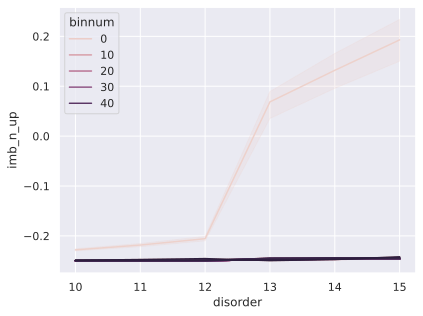

In [18]:
sns.lineplot(data=df, x="disorder", y="imb_n_up", hue="binnum")

## Spin Imbalance
We can ask for spin imbalance in three different ways:
1. Spin Up Imbalance $A = {sites\ where\ }$

In [25]:
upList, downList = putils.get_initial_condition(pattern, length)
# For charge imbalance
if upList is None:
    upList = []
if downList is None:
    downList = []
setAup = list(upList)
setAdown = list(downList)

# data = []
# for coupling, disorder in pspace:
#     print(f"α = {coupling} W = {disorder}")
#     for binnum in tqdm(range(-1, totalbins)):
#         densities = get_densities(length, coupling, disorder, binnum, pattern)
#         charge_density = densities[0] + densities[1]
#         datapoint = {
#             "coupling": coupling,
#             "disorder": disorder,
#             "binnum": binnum,
#             "spin_up_imb_n_up": calculate_imbalance(densities[0], length, setAup),
#             "spin_up_imb_n_down": calculate_imbalance(densities[1], length, setAup),
#             "spin_up_imb_S_plus": calculate_imbalance(densities[2], length, setAup),
#             "spin_up_imb_S_minus": calculate_imbalance(densities[3], length, setAup),
#             "spin_up_imb_charge": calculate_imbalance(charge_density, length, setAup),
#             "spin_down_imb_n_up": calculate_imbalance(densities[0], length, setAdown),
#             "spin_down_imb_n_down": calculate_imbalance(densities[1], length, setAdown),
#             "spin_down_imb_S_plus": calculate_imbalance(densities[2], length, setAdown),
#             "spin_down_imb_S_minus": calculate_imbalance(densities[3], length, setAdown),
#             "spin_down_imb_charge": calculate_imbalance(charge_density, length, setAdown)
#         }
#         data.append(datapoint)
        
# df = pd.DataFrame(data)

In [20]:
df

,coupling,disorder,binnum,spin_up_imb_n_up,spin_up_imb_n_down,spin_up_imb_S_plus,spin_up_imb_S_minus,spin_up_imb_charge,spin_down_imb_n_up,spin_down_imb_n_down,spin_down_imb_S_plus,spin_down_imb_S_minus,spin_down_imb_charge
0,1.5,10,-1,-0.483868,-0.483868,-1.367435+0.145049j,-1.367435-0.145049j,-0.483868,-0.483868,-0.483868,-1.367435+0.145049j,-1.367435-0.145049j,-0.483868
1,1.5,10,0,-0.499371,-0.499371,-1.304483-0.043195j,-1.304483+0.043195j,-0.499371,-0.499371,-0.499371,-1.304483-0.043195j,-1.304483+0.043195j,-0.499371
2,1.5,10,1,-0.499383,-0.499383,-1.290347-0.085220j,-1.290347+0.085220j,-0.499383,-0.499383,-0.499383,-1.290347-0.085220j,-1.290347+0.085220j,-0.499383
3,1.5,10,2,-0.499358,-0.499358,-1.214698-0.006265j,-1.214698+0.006265j,-0.499358,-0.499358,-0.499358,-1.214698-0.006265j,-1.214698+0.006265j,-0.499358
4,1.5,10,3,-0.499439,-0.499439,-0.550302+0.099327j,-0.550302-0.099327j,-0.499439,-0.499439,-0.499439,-0.550302+0.099327j,-0.550302-0.099327j,-0.499439
...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,0.5,15,45,-0.496774,-0.496774,0.597876+0.959024j,0.597876-0.959024j,-0.496774,-0.496774,-0.496774,0.597876+0.959024j,0.597876-0.959024j,-0.496774
914,0.5,15,46,-0.496373,-0.496373,-0.759458-0.977591j,-0.759458+0.977591j,-0.496373,-0.496373,-0.496373,-0.759458-0.977591j,-0.759458+0.977591j,-0.496373
915,0.5,15,47,-0.496326,-0.496326,-1.140869+0.640469j,-1.140869-0.640469j,-0.496326,-0.496326,-0.496326,-1.140869+0.640469j,-1.140869-0.640469j,-0.496326
916,0.5,15,48,-0.495881,-0.495881,-1.030085-0.758860j,-1.030085+0.758860j,-0.495881,-0.495881,-0.495881,-1.030085-0.758860j,-1.030085+0.758860j,-0.495881


In [21]:
df.to_csv(f"data/spin_imbalances_L{length}_{pattern}.dat")

In [8]:
# df = pd.read_csv(f"data/spin_imbalances_L{length}_{pattern}.dat")
df = pd.read_csv(f"data/spin_imbalances.dat")
complex_types = {
    'spin_up_imb_S_plus': complex,
    'spin_up_imb_S_minus': complex,
    'spin_down_imb_S_plus': complex,
    'spin_down_imb_S_minus': complex,
}
df = df.astype(complex_types)

In [9]:
loc_df = df.loc[df["disorder"].isin([13, 14, 15])]
deloc_df = df.loc[df["disorder"].isin([10, 11, 12])]

In [10]:
df

,Unnamed: 0,coupling,disorder,binnum,spin_up_imb_n_up,spin_up_imb_n_down,spin_up_imb_S_plus,spin_up_imb_S_minus,spin_up_imb_charge,spin_down_imb_n_up,spin_down_imb_n_down,spin_down_imb_S_plus,spin_down_imb_S_minus,spin_down_imb_charge
0,0,1.5,10,-1,0.007894,-0.007897,-0.625518+0.775339j,-0.625518-0.775339j,8.475985e-14,-0.007894,0.007897,0.625518-0.775339j,0.625518+0.775339j,-8.475985e-14
1,1,1.5,10,0,0.000623,-0.000623,-0.328491+0.268051j,-0.328491-0.268051j,-1.375295e-14,-0.000623,0.000623,0.328491-0.268051j,0.328491+0.268051j,1.376874e-14
2,2,1.5,10,1,0.000653,-0.000653,-0.405860+1.222998j,-0.405860-1.222998j,1.263187e-16,-0.000653,0.000653,0.405860-1.222998j,0.405860+1.222998j,-1.421085e-16
3,3,1.5,10,2,0.000556,-0.000556,0.101756-0.909940j,0.101756+0.909940j,-4.515894e-14,-0.000556,0.000556,-0.101756+0.909940j,-0.101756-0.909940j,4.517177e-14
4,4,1.5,10,3,0.000527,-0.000527,0.073929-0.166378j,0.073929+0.166378j,1.515825e-15,-0.000527,0.000527,-0.073929+0.166378j,-0.073929-0.166378j,-1.531614e-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,913,0.5,15,45,0.002620,-0.002619,1.305030-0.196869j,1.305030+0.196869j,1.389506e-14,-0.002620,0.002619,-1.305030+0.196869j,-1.305030-0.196869j,-1.389506e-14
914,914,0.5,15,46,0.003043,-0.003042,0.655826-0.630666j,0.655826+0.630666j,-1.389506e-14,-0.003043,0.003042,-0.655826+0.630666j,-0.655826-0.630666j,1.389506e-14
915,915,0.5,15,47,0.003004,-0.003006,0.854304+1.480027j,0.854304-1.480027j,0.000000e+00,-0.003004,0.003006,-0.854304-1.480027j,-0.854304+1.480027j,0.000000e+00
916,916,0.5,15,48,0.003418,-0.003418,0.164399+0.725990j,0.164399-0.725990j,1.389506e-14,-0.003418,0.003418,-0.164399-0.725990j,-0.164399+0.725990j,-1.389506e-14


<AxesSubplot:xlabel='disorder', ylabel='coupling'>

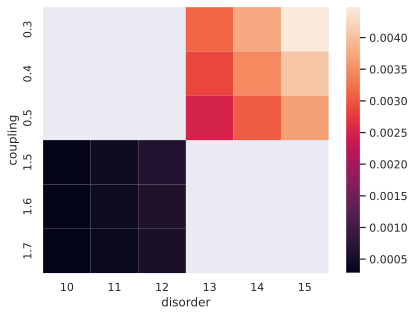

In [11]:
sns.heatmap(data=pd.pivot_table(data=df, index="coupling", columns="disorder", values="spin_up_imb_n_up"))

In [12]:
imbalances_real = ["spin_up_imb_n_up", "spin_up_imb_n_down",  "spin_up_imb_charge", "spin_down_imb_n_up",
            "spin_down_imb_n_down", "spin_down_imb_charge"]
imbalances_complex = ["spin_up_imb_S_plus",
            "spin_up_imb_S_minus", "spin_down_imb_S_plus", "spin_down_imb_S_minus",]
imbalances_considered = ["spin_up_imb_n_up"] #, "spin_down_imb_n_down"]

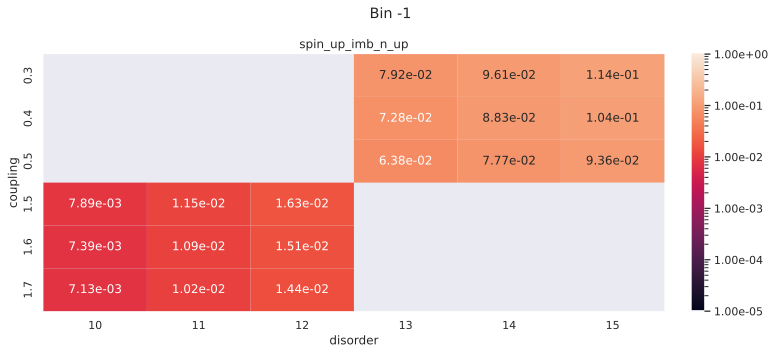

In [13]:
binnum = -1
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(11, 5))
for i, imb in enumerate(imbalances_considered):
    # ax = axes.flatten()[i]
    ax = axes
    pivoted = pd.pivot_table(data=df.loc[df["binnum"]==binnum], index="coupling",
                            columns="disorder", values=imb)
    cbar_kwargs = colorbar_kwargs.copy()
    # vmin = pivoted.min().min()
    # vmax = pivoted.max().max()
    vmin = 1e-5
    vmax = 1e0
    # print(vmin, vmax)
    norm = mpl.colors.LogNorm(vmin=vmin, vmax=vmax)
    # cbar_kwargs["ticks"] = np.logspace(0, -3, 4)
    sns.heatmap(data=pivoted, ax=ax, cbar_kws=cbar_kwargs, norm=norm, annot=True, fmt=".2e")
    ax.set_title(imb)
fig.suptitle(f"Bin {binnum}")
fig.tight_layout()

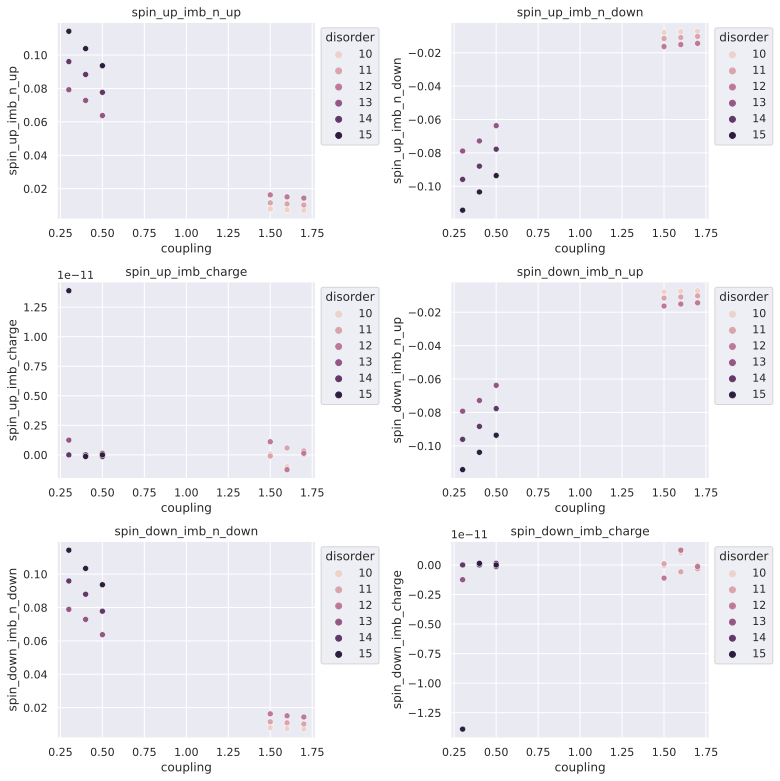

In [14]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(11, 11))
for i, imb in enumerate(imbalances_real):
    ax = axes.flatten()[i]
    # pivoted = pd.pivot_table(data=df, index="coupling", columns="disorder", values=imb)
    sns.scatterplot(data=df.loc[df["binnum"]==-1], x="coupling", y=imb, hue="disorder", ax=ax)
    ax.set_xlim(np.min(ax.get_xlim()), np.max(ax.get_xlim()))
    ax.set_ylim(np.min(ax.get_ylim()), np.max(ax.get_ylim()))
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    ax.set_title(imb)
fig.tight_layout()

In [ ]:

for disorder in [13, 14, 15]:
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(11, 11))
    # for binnum in range(-1, totalbins):
    for i, imb in enumerate(imbalances_considered):
        # ax = axes.flatten()[i]
        ax = axes
        # pivoted = pd.pivot_table(data=df, index="coupling", columns="disorder", values=imb)
        cond = (loc_df["disorder"] == disorder)
        sns.scatterplot(data=loc_df.loc[cond], x="binnum", y=imb, hue="coupling", ax=ax)
        # ax.set_xlim(np.min(ax.get_xlim()), np.max(ax.get_xlim()))
        # ax.set_ylim(np.min(ax.get_ylim()), np.max(ax.get_ylim()))
        # sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
        ax.set_yscale("log")
        ax.set_title(f"{imb} W = {disorder}")

    fig.tight_layout()
    filename = f"imbalances_60x60_W{disorder}"
    fig.savefig("plots/PNGs/" + filename + ".png")
    fig.savefig("plots/PDFs/" + filename + ".pdf")
    plt.close(fig)

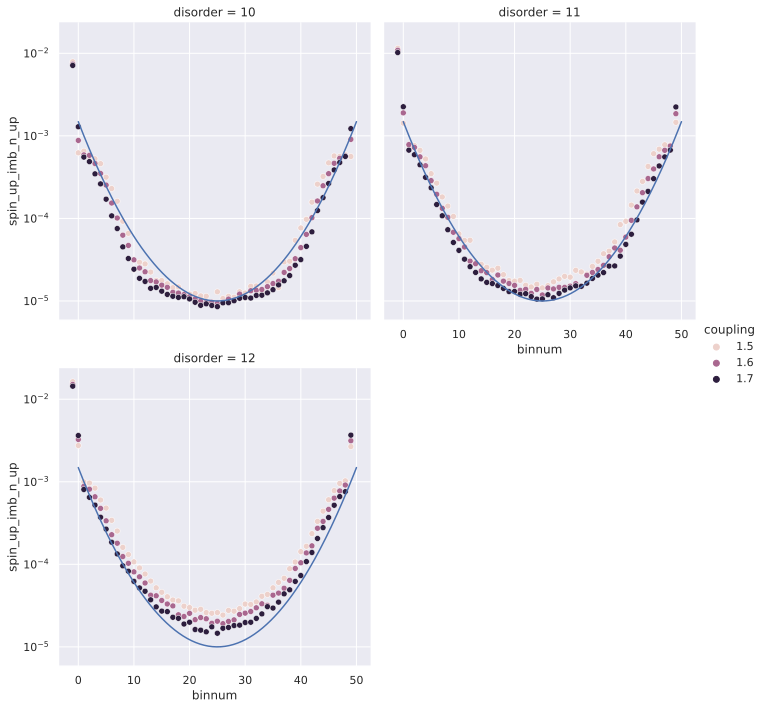

In [17]:
data = deloc_df
plot = sns.relplot(data=data, x="binnum", y=data["spin_up_imb_n_up"], hue="coupling",
                   col="disorder", col_wrap=2)
x = np.linspace(0, 50, 200)
y = 1e-5 * np.exp(8e-3*(x-25)**2)
for ax in plot.fig.axes:
    ax.set_yscale('log')
    ax.plot(x, y)

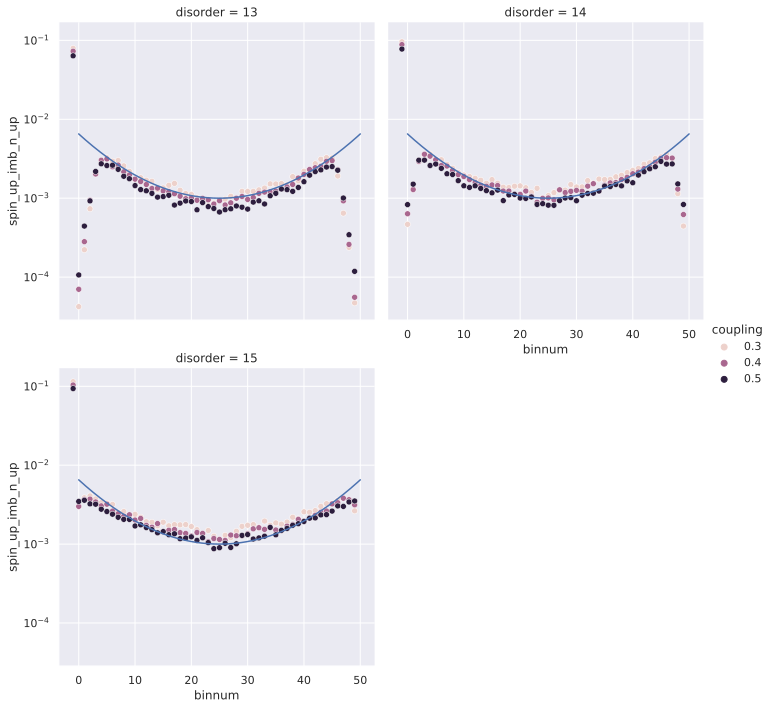

In [18]:
data = loc_df
plot = sns.relplot(data=data, x="binnum", y=data["spin_up_imb_n_up"], hue="coupling",
                   col="disorder", col_wrap=2)

x = np.linspace(0, 50, 200)
y = 1e-3 * np.exp(3e-3*(x-25)**2)

for ax in plot.fig.axes:
    ax.set_yscale('log')
    ax.plot(x, y)

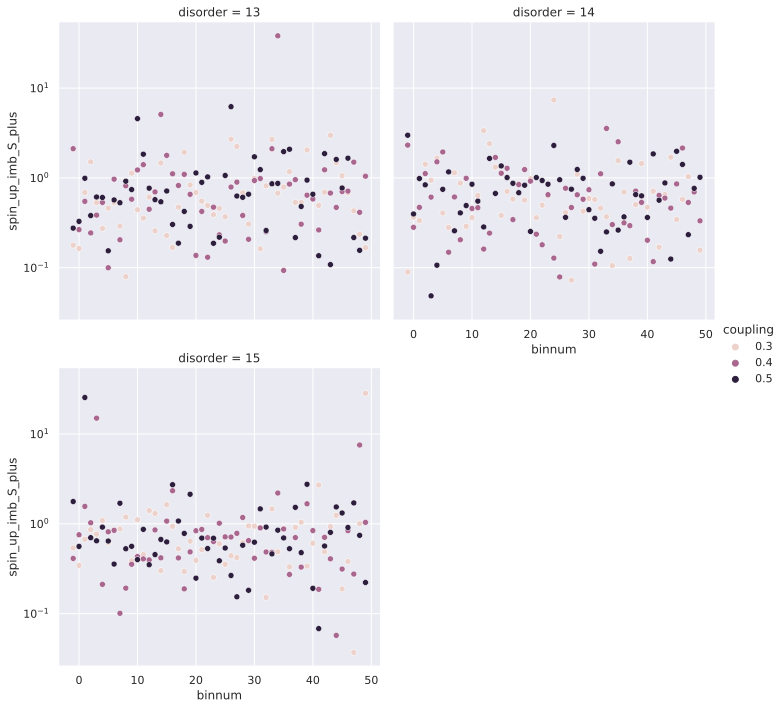

In [20]:
plot = sns.relplot(data=loc_df, x="binnum", y=np.abs(loc_df["spin_up_imb_S_plus"]),
                   hue="coupling", col="disorder", col_wrap=2)
# x = np.linspace(0, 50, 200)
# y = 1e-3 * np.exp(3e-3*(x-25)**2)

for ax in plot.fig.axes:
    ax.set_yscale('log')
    # ax.plot(x, y)

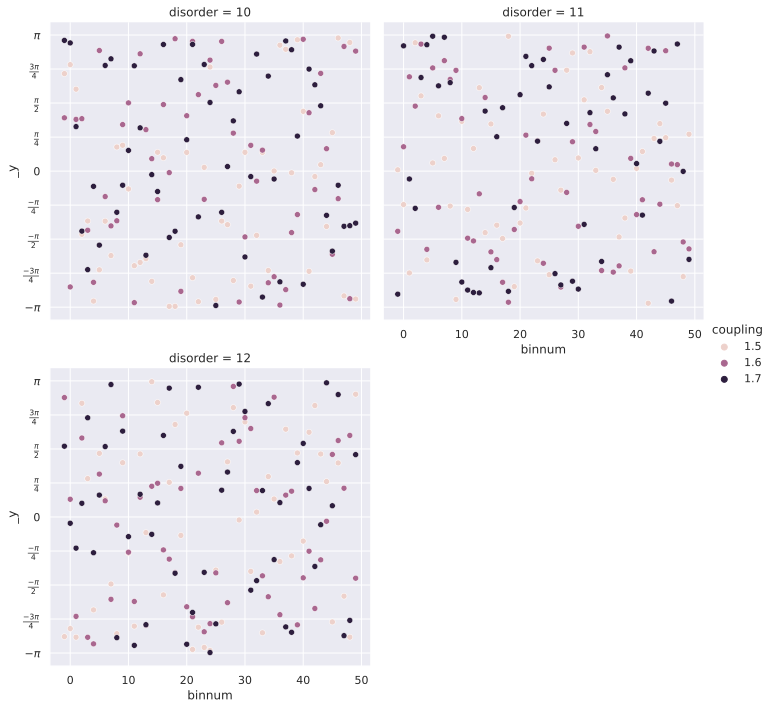

In [21]:
plot = sns.relplot(data=deloc_df, x="binnum",
                   y=np.angle(deloc_df["spin_up_imb_S_plus"]),
                   hue="coupling", col="disorder", col_wrap=2)
x = np.linspace(0, 50, 200)
y = 1e-3 * np.exp(3e-3*(x-25)**2)
for ax in plot.fig.axes:
    ticks = np.pi * np.array([-1, -3/4, -1/2, -1/4, 0, 1/4, 1/2, 3/4, 1])
    ticklabels = [r"$-\pi$", r"$\frac{-3\pi}{4}$", r"$\frac{-\pi}{2}$", r"$\frac{-\pi}{4}$", 0,
                 r"$\frac{\pi}{4}$", r"$\frac{\pi}{2}$", r"$\frac{3\pi}{4}$", r"$\pi$"]
    ax.set_yticks(ticks=ticks, labels=ticklabels)
    # ax.set_yscale('log')
    # ax.plot(x, y)

0.000000e+00


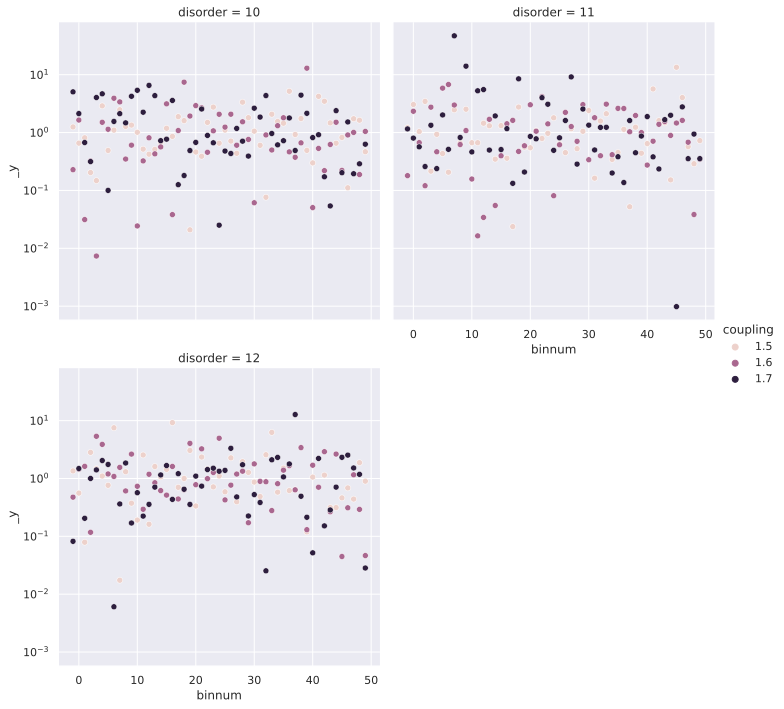

In [29]:
sigma_x = deloc_df["spin_up_imb_S_plus"] + deloc_df["spin_up_imb_S_minus"]
print(f"{np.abs(np.imag(sigma_x)).min():e}")
plot = sns.relplot(data=deloc_df, x="binnum",
                   y=np.abs(np.real(sigma_x)),
                   hue="coupling", col="disorder", col_wrap=2)
x = np.linspace(0, 50, 200)
y = 1e-3 * np.exp(3e-3*(x-25)**2)
for ax in plot.fig.axes:
#     ticks = np.pi * np.array([-1, -3/4, -1/2, -1/4, 0, 1/4, 1/2, 3/4, 1])
#     ticklabels = [r"$-\pi$", r"$\frac{-3\pi}{4}$", r"$\frac{-\pi}{2}$", r"$\frac{-\pi}{4}$", 0,
#                  r"$\frac{\pi}{4}$", r"$\frac{\pi}{2}$", r"$\frac{3\pi}{4}$", r"$\pi$"]
#     ax.set_yticks(ticks=ticks, labels=ticklabels)
    ax.set_yscale('log')
    # ax.plot(x, y)

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(11, 11))
for binnum in range(-1, totalbins):
    for i, imb in enumerate(imbalances_considered):
        ax = axes.flatten()[i]
        # pivoted = pd.pivot_table(data=df, index="coupling", columns="disorder", values=imb)
        sns.scatterplot(data=np.and(df.loc[df["binnum"]==binnumdf[]], x="coupling", y=imb, hue="disorder", ax=ax)
        ax.set_xlim(np.min(ax.get_xlim()), np.max(ax.get_xlim()))
        ax.set_ylim(np.min(ax.get_ylim()), np.max(ax.get_ylim()))
        sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
        ax.set_title(imb)
    fig.tight_layout()
    filename = f"imbalances_60x60_bin{binnum}"
    fig.savefig("plots/PNGs/" + filename + ".png")
    fig.savefig("plots/PDFs/" + filename + ".pdf")
    plt.close(fig)

In [26]:
density = np.zeros((length,length))
for x in range(length):
    for y in range(length):
        index = x + length*y
        # if(index in upList):
        #     density[x, y] += 1
        if(index in downList):
            density[x, y] += 1

print(density)
calculate_imbalance(density, length, setAup)

[[0. 1. 0. ... 1. 0. 1.]
 [1. 0. 1. ... 0. 1. 0.]
 [0. 1. 0. ... 1. 0. 1.]
 ...
 [1. 0. 1. ... 0. 1. 0.]
 [0. 1. 0. ... 1. 0. 1.]
 [1. 0. 1. ... 0. 1. 0.]]


-1.0